# Homework 3

In [1]:
#Initialiation générale
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib notebook
from math import *
coth = lambda z: tanh(z)**(-1);

# Introduction

Après les deux premiers homeworks, vous êtes capables de programmer les éléments-finis en 1D. Continuons maintenant par une équation différentielle différente de celle considérée lors des deux premiers homeworks : 

\begin{equation}
\left\{
\begin{array}{cc}
-\varepsilon u'' + \lambda u = f \quad & x \in ]0,L[\\
u(0) = 0&\\
u(L) = 1&
\end{array}
\right.
\end{equation}

L'équation différentielle intervenant dans la formulation forte est la forme stationnaire de l'EDP nommée **équation d'advection-diffusion**. En effet, $\lambda = 0$ donne l'équation de diffusion de la chaleur stationnaire (elliptique) tandis que $\varepsilon = 0$ donne la version stationnaire de l'équation d'advection (ou de transport) qui est hyperbolique.

En général, on fait apparaître le nombre de Péclet $Pe = L \lambda / \varepsilon$ qui représente le rapport entre les effets de transport et de
diffusion.

Physiquement, cette EDP peut modéliser l’évolution de la concentration d’espèces chimiques $u$ transportées par un
fluide dans une canalisation de longueur $L$. $\varepsilon$ représente alors la diffusivité des espèces chimiques dans le fluide, $\lambda$ la vitesse du fluide et $f$ un terme source qui modélise la production et la disparition des espèces chimiques.

Définissons tout d'abord quelques variables représentatives de notre problème :

<IPython.core.display.Javascript object>


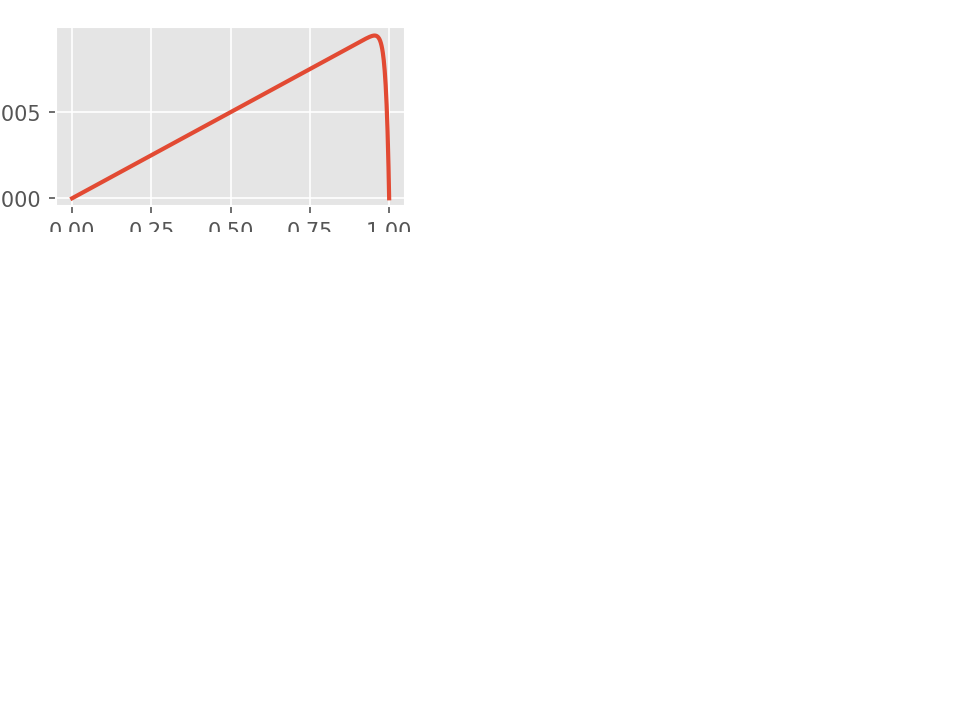

In [2]:
#Paramètres du problème:
L=1.; 
Nelem = 15;
Pe = 100. ; #Nombre de Péclet fixé
Epsilon = 1. ;
f = 1.;

# Solution analytique
uex = lambda x: f/(Pe * Epsilon) * (x - (np.exp(Pe * x) - 1.)/(np.exp(Pe) - 1.) );
nodesPlot = np.linspace(0,L,1000);

#Tracé de la solution analytique
plt.figure(1);
plt.plot(nodesPlot, uex(nodesPlot), lw=2)
plt.xlabel('x', fontsize='large')
plt.ylabel(r'$u^{ex}$', fontsize='large')
plt.show()

# Formulation faible

Montrez que la formulation faible du problème s'écrit :

Trouver $u \in \mathcal{C}(O)$ tel que
\begin{equation}
a(v,u) = b(v) \quad \forall v \in \mathcal{C}(O)
\end{equation}

avec :
\begin{equation}
a(v,u) = \int_O^L \varepsilon v' u' dx + \int_O^L \lambda v u' dx
\end{equation}

et
\begin{equation}
b(v) = \int_O^L f v dx
\end{equation}



# Eléments finis

## Matrices élémentaires

Nous utiliserons des éléments linéaires. **Montrer que les matrices associées aux deux termes de la forme bilinéaire s'écrivent :**

\begin{equation}
K_e^\varepsilon = \frac{\varepsilon}{L_e}
\begin{bmatrix}
1 & -1\\
-1 & 1
\end{bmatrix}
\end{equation}

\begin{equation}
K_e^\lambda = \frac{\lambda}{2}
\begin{bmatrix}
-1 & 1\\
-1 & 1
\end{bmatrix}
\end{equation}


## Code


Placez votre code dans une fonction afin de pouvoir faire des tests plus facilement. Pour vous entrainer, vous pouvez tout d'abord reprendre le homework N°2 et en faire une seule fonction ayant pour interface `solveFE(L, Nelem, s)` cette fonction renvoie `(nodes, u)`.

Pour cet exercice, la fonction a pour interface `solveFE(L, Nelem, Pe, Epsilon, f)` et renvoie `(nodes, u)`.

In [4]:
#Eléments finis : placez votre code dans une fonction afin de pouvoir faire des tests plus facilement
#Note : ici, on a deux termes dans la matrice du système !

def solveFE(L, Nelem, Pe, Epsilon, f):
    Lambda  = Pe * Epsilon ;
    K = np.zeros([Nelem+1,Nelem+1]);
    nodes = np.linspace(0,L,Nelem+1);
    b = np.zeros(Nelem+1);
    u = np.zeros(Nelem+1);
    u[-1]=1;
    Ke1 = np.matrix([[Epsilon*Nelem,-Epsilon*Nelem],[-Epsilon*Nelem,Epsilon*Nelem]]);
    Ke2= np.matrix([[-Lambda/2,Lambda/2],[-Lambda/2,Lambda/2]]);
    Ke=Ke1+Ke2;
    be= np.array((f/(2*Nelem),f/(2*Nelem)));
    for iel in range(Nelem):
        # print(K[iel:iel+2,iel:iel+2])
        K[iel:iel+2,iel:iel+2]+=Ke;
    for iel in range(Nelem):
        b[iel:iel+2]+=be;
    for i in range(Nelem):
        b[i]=b[i]-K[i,Nelem]*1;
    bred=b[1:Nelem];
    Kred=K[1:Nelem,1:Nelem];
    ured = np.linalg.solve(Kred,bred);
    for i in range(1,Nelem):
        u[i] = ured[i-1]
    return (nodes, u);




# Etude des résultats

Vous pouvez maintenant lancer le calcul éléments finis avec les paramètres fixés plus haut.

In [ ]:
(nodes, uEF) = solveFE(L, Nelem, Pe, Epsilon, f)
K.shape

Tracez également la solution :

<IPython.core.display.Javascript object>


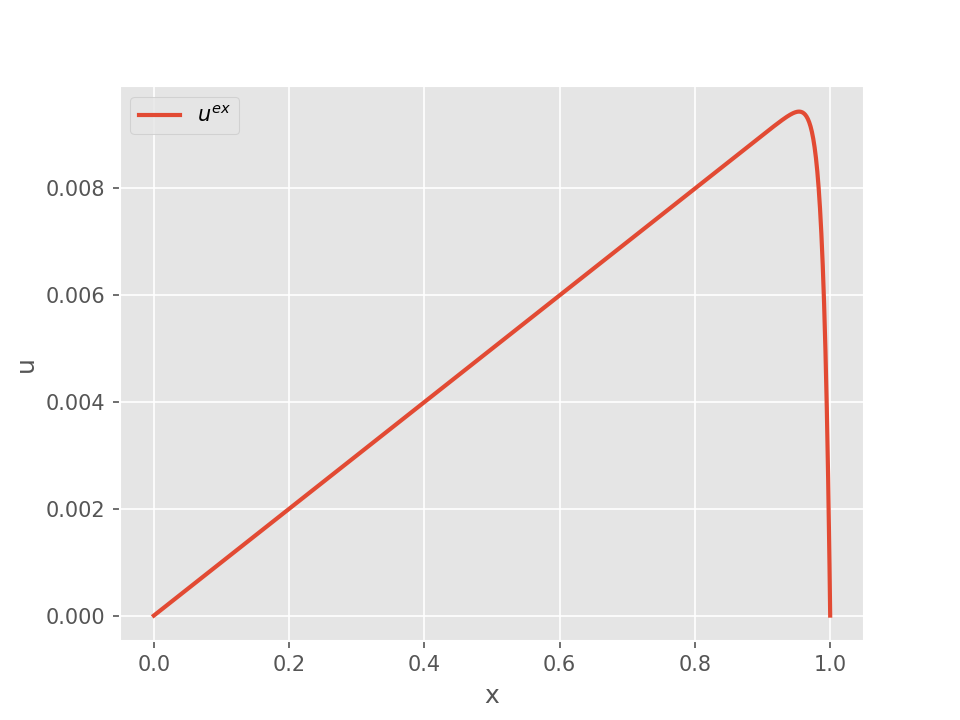

In [6]:
#Tracé de la solution:
plt.figure()
plt.plot(nodesPlot, uex(nodesPlot), linewidth=2, label=r'$u^{ex}$')
plt.legend()
plt.xlabel('x')
plt.ylabel('u')
plt.show()

Vous pouvez faire varier les paramètres et tracer la solution.

<IPython.core.display.Javascript object>


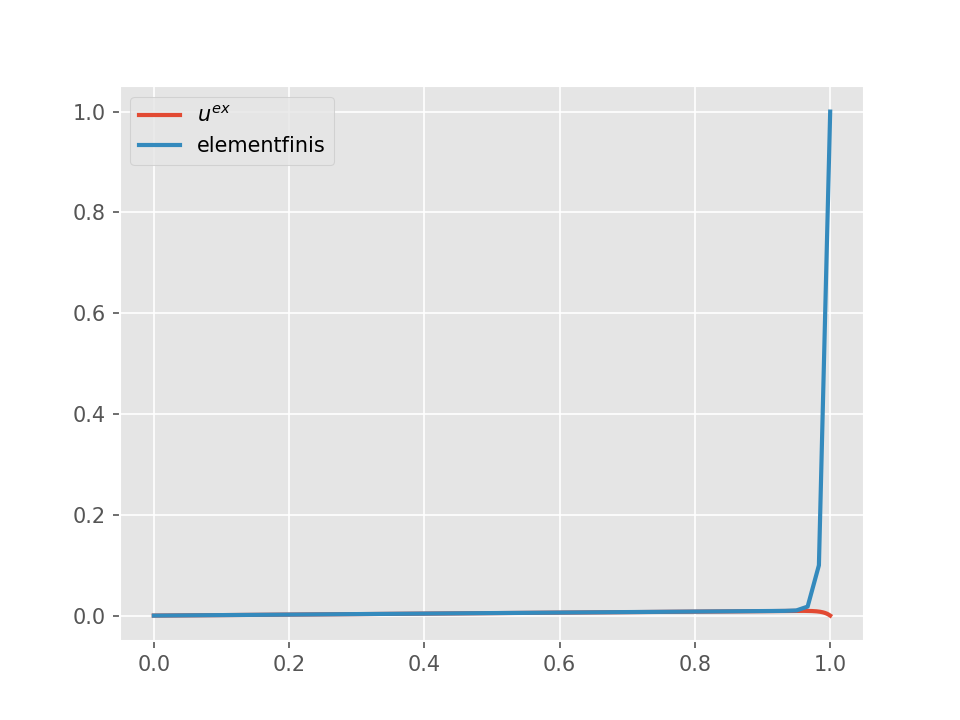

NameError: name 'K' is not defined

In [8]:
Nelem = 60;
(nodes, uEF) = solveFE(L, Nelem, Pe, Epsilon, f)
#print(nodes,uEF)
plt.figure()
plt.plot(nodesPlot, uex(nodesPlot), linewidth=2, label=r'$u^{ex}$')
plt.plot(nodes,uEF,linewidth=2, label='elementfinis')
plt.legend()
K.shape

In [ ]:
Nelem = 30;
(nodes, uEF) = solveFE(L, Nelem, Pe, Epsilon, f)
plt.figure()
plt.plot(nodesPlot, uex(nodesPlot), linewidth=2, label=r'$u^{ex}$')
plt.legend()

ValueError: non-broadcastable output operand with shape (1,1) doesn't match the broadcast shape (2,2)

In [ ]:
Nelem = 90;
(nodes, uEF) = solveFE(L, Nelem, Pe, Epsilon, f)
plt.figure()
plt.plot(nodesPlot, uex(nodesPlot), linewidth=2, label=r'$u^{ex}$')
....
plt.legend()


SyntaxError: invalid syntax (3514711217.py, line 5)

<IPython.core.display.Javascript object>


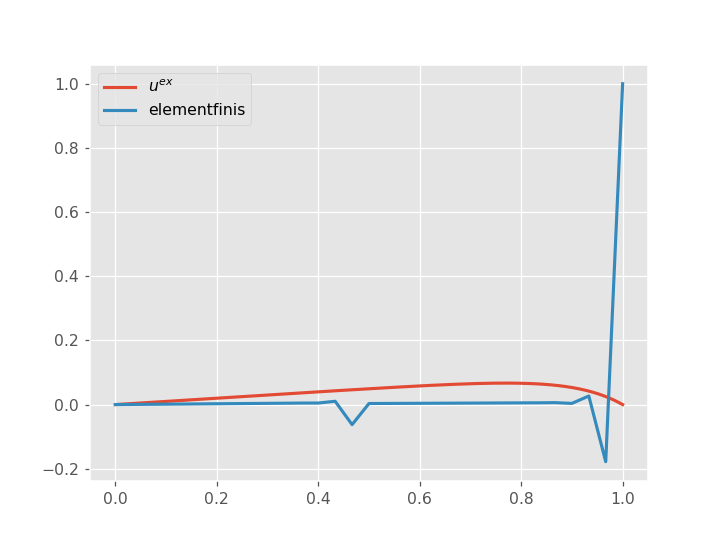

In [ ]:
plt.figure(4)
Nelem = 15;
Pe = 10. ;
plt.plot(nodesPlot, uex(nodesPlot), linewidth=2, label=r'$u^{ex}$')
(nodes, uEF) = solveFE(L, Nelem, Pe, Epsilon, f)
plt.plot(nodes,uEF,linewidth=2, label='elementfinis')
plt.legend()

# Interprétations

Comme vous avez pu le constater :
- A maillage donné, un Péclet trop élevé rend la solution éléments finis instable
- A nombre de Péclet donné, raffiner le maillage permet de retrouver une solution numérique raisonnable

Ce comportement est dû au fait que la méthode de **Bubnov** Galerkin n'est pas adaptée à la résolution de phénomènes de transport (Péclet élevé $\Rightarrow$ effets de transport prépondérants). En pratique, il est nécessaire d'adapter la méthode des éléments-finis en la basant non pas sur l'approche de **Bubnov** Galerkin, mais sur celle de **Petrov** Galerkin. Cette dernière utilise des fonctions tests provenant d'un espace différent de celui de la solution.